# Continuous coordinates demo notebook

### Imports

In [1]:
import os
from datetime import datetime

from utils import plot_sample_grid
from train import load_netG_for_eval
from continuous_coordinates import make_interpolation_grid


### Set some globals

In [2]:
CHECKPOINT_DIR = "checkpoints"
OUTPUT_DIR = "output_dir/1_continuous_coordinates"
SUPER_RES_MODEL_DIR = "lap_sr_models"
DEVICE = "cpu"

os.makedirs(OUTPUT_DIR, exist_ok=True)

### Load a trained GAN generator from a checkpoint

In [3]:
# One checkpoint by default, you may add you're own checkpoints by altering this line
all_checkpoints = [f"{CHECKPOINT_DIR}/{ckpt}" for ckpt in os.listdir("checkpoints") if "PART-1" in ckpt]
checkpoint = all_checkpoints[0]

netG, hp = load_netG_for_eval(checkpoint_path=checkpoint, device=DEVICE)

print("Checkpoint used for this demo:", checkpoint)
print("Generator network:", netG)
print("Hyper pameters:")
for k, v in hp.items():
    print(f"\t{k} : {v}")

Checkpoint used for this demo: checkpoints/PART-1-GAN-IDX-10-DATASET-tile_gan_05_april_simple_w_triangle-EPOCH-99.pt
Generator network: Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Re

### Plot some random samples from the generator

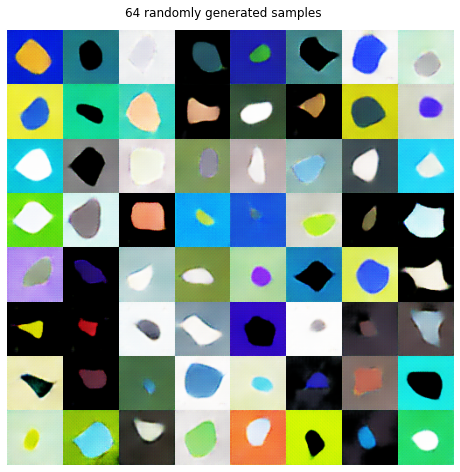

In [4]:
n_samples = 64
n_cols = 8

noise, images = plot_sample_grid(64, netG, nz=hp["nz"], scale=1.0, fixed_noise=None, cell_size=1.0, 
                                 title=f"{n_samples} randomly generated samples", 
                                 device=DEVICE, ncols=n_cols, title_y=0.92)

### Make interpolation grids and animations

Saving results to: output_dir/1_continuous_coordinates/06-15-2022---170816
Saving separate interpolated images
Making animation video of interpolation.
Done making video, saved at: output_dir/1_continuous_coordinates/06-15-2022---170816/animation.mp4
Making grid animation video.


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (872, 872) to (880, 880) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


[swscaler @ 0x7fdaf3e77000] Warning: data is not aligned! This can lead to a speed loss


Done making video, saved at: output_dir/1_continuous_coordinates/06-15-2022---170816/grid-animation.mp4
Saving static grid image
Done!


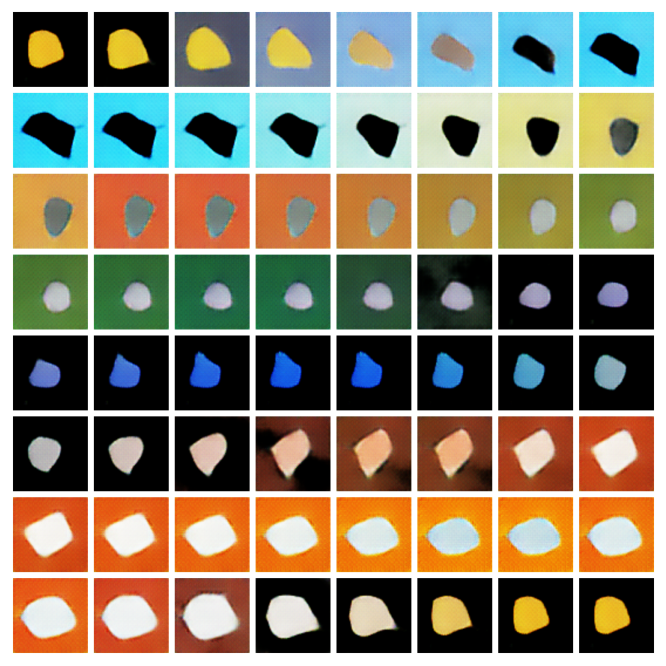

In [15]:
# Square grids
n_rows = n_cols = 8

# In case you want to provide your own noise, it needs to be of the following shape
# interpolation_noise = torch.randn((n_rows-1, 100, 1, 1))

date_time = datetime.now().strftime("%m-%d-%Y---%H%M%S")
save_dir = f"{OUTPUT_DIR}/{date_time}"

print("Saving results to:", save_dir)

# Set upscale to True to get larger images
make_interpolation_grid(netG, n_rows, n_cols, save_dir, interpolation_noise=None, pad_value=1.0, 
                        padding=8, grid_img_size=100, nz=100,  device=DEVICE, 
                        upscale=False, upscale_times=4, upscale_models_dir=SUPER_RES_MODEL_DIR)
